In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
fraud= pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.duplicated().sum()

0

In [8]:
fraud1= fraud.copy()
list=[]
for i in range(0,len(fraud)):
  if fraud['Taxable.Income'][i] <=30000:
    list.append('Risky')
  elif fraud['Taxable.Income'][i] >30000:
    list.append('Good')

fraud1['Type']= list
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud1.Type.value_counts()

Type
Good     476
Risky    124
Name: count, dtype: int64

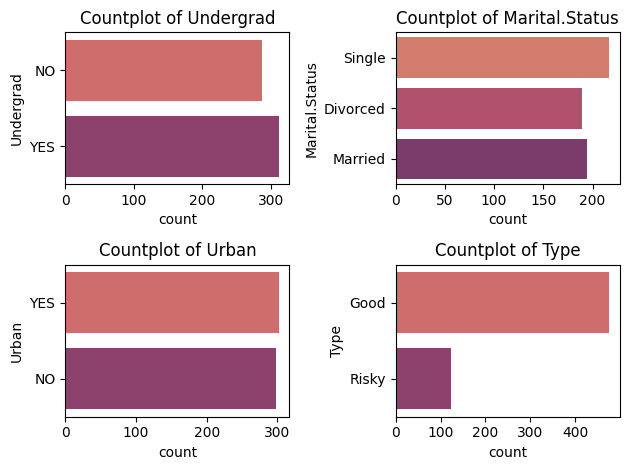

In [10]:
column=["Undergrad","Marital.Status","Urban","Type"]                         ####for categorical variable
for j,i in enumerate(column,start=1):
  plt.subplot(2,2,j)
  sns.countplot(fraud1[i],palette= 'flare')
  plt.title(f'Countplot of {i}')
  plt.tight_layout()

plt.show()

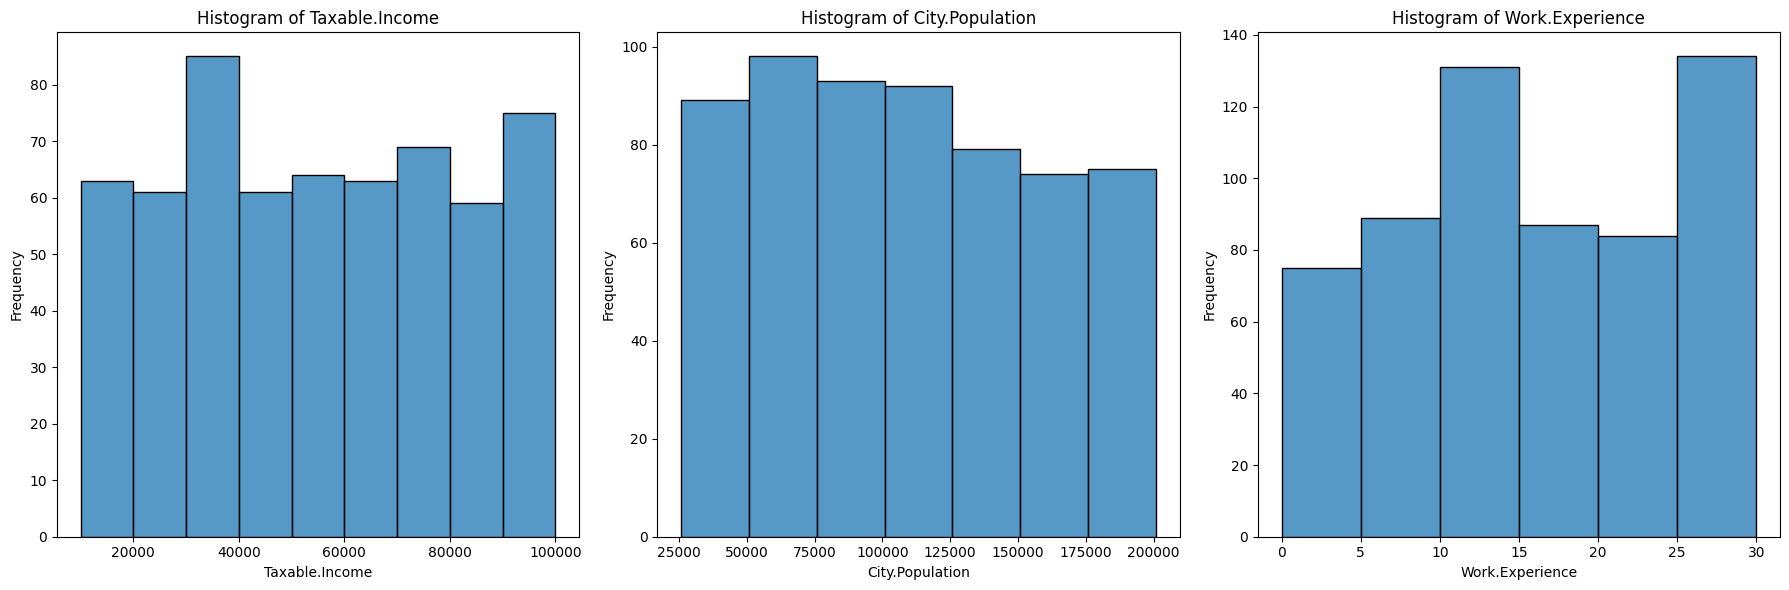

In [11]:
colnames = ['Taxable.Income', 'City.Population', 'Work.Experience']

bin_widths = [10000, 25000, 5]

plt.figure(figsize=(18, 6))

for index, colname, bin_width in zip(range(1, len(colnames) + 1), colnames, bin_widths):
    plt.subplot(1, 3, index)
    sns.histplot(fraud1[colname], bins=range(min(fraud1[colname]), max(fraud1[colname]) + bin_width, bin_width))
    plt.title(f'Histogram of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

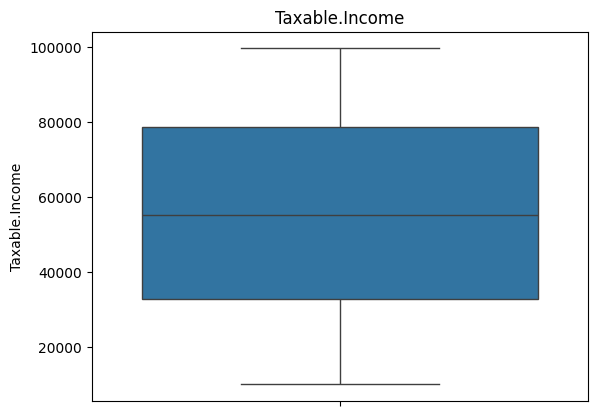

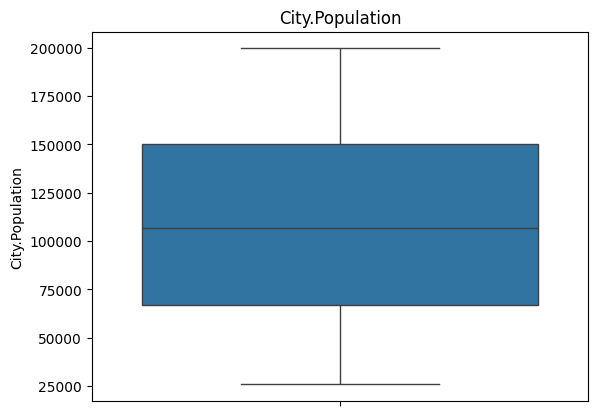

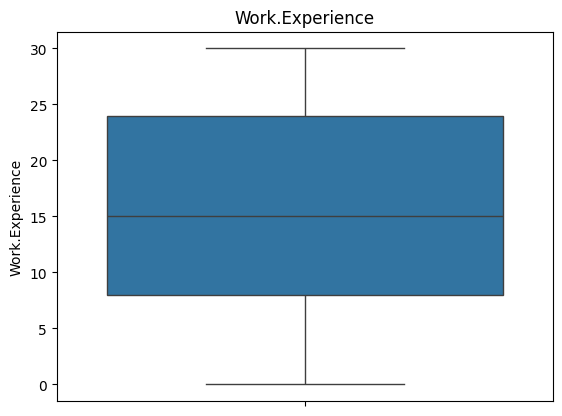

In [12]:
for colname in colnames:
  sns.boxplot(fraud1[colname])
  plt.title(f'{colname}')
  plt.show()

In [13]:
fraud2= fraud1.copy()
fraud2= fraud2.rename(columns={'Marital.Status':'martial_status','Taxable.Income':"taxable_income","City.Population":"city_population",'Work.Experience':"work_experience"})
fraud2.drop('taxable_income',axis=1,inplace= True)

In [14]:
fraud2.head()

,Undergrad,martial_status,city_population,work_experience,Urban,Type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [15]:
x= fraud2.drop('Type',axis=1)
y= fraud2['Type']

In [16]:
x= pd.get_dummies(x)
x.head()

,city_population,work_experience,Undergrad_NO,Undergrad_YES,martial_status_Divorced,martial_status_Married,martial_status_Single,Urban_NO,Urban_YES
0,50047,10,True,False,False,False,True,False,True
1,134075,18,False,True,True,False,False,False,True
2,160205,30,True,False,False,True,False,False,True
3,193264,15,False,True,False,False,True,False,True
4,27533,28,True,False,False,True,False,True,False


In [17]:
le= LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

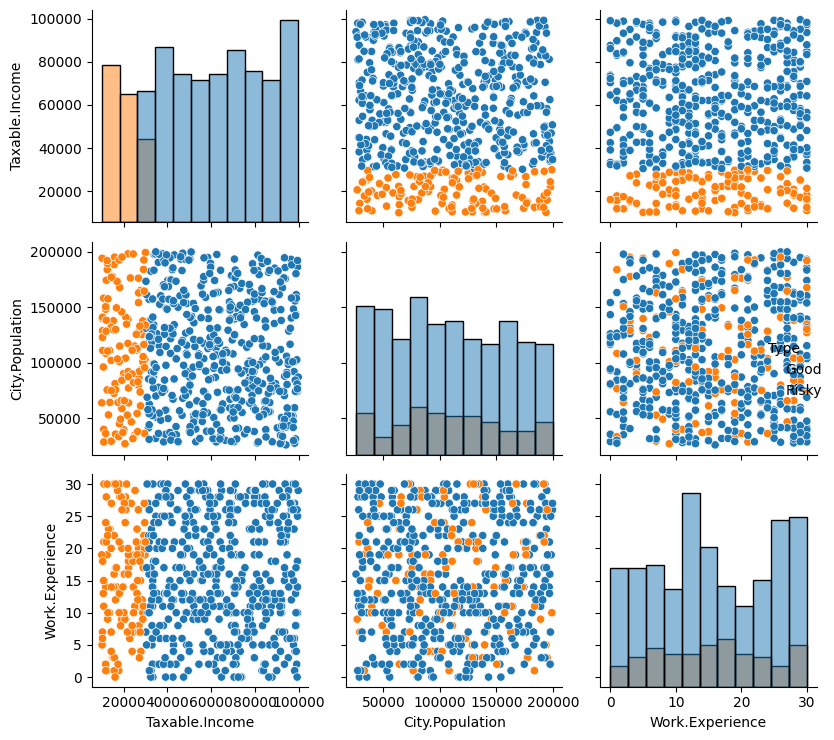

In [38]:
sns.pairplot(data=fraud1, hue = 'Type', diag_kind="hist")
plt.tight_layout()

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

# **Decision Tree Classifier**

a)Entropy Method

In [19]:
entropy_m= DecisionTreeClassifier(criterion='entropy',max_depth=4)
entropy_m.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
entropy_pred= entropy_m.predict(x_test)

In [21]:
np.mean(y_test==entropy_pred)

0.7833333333333333

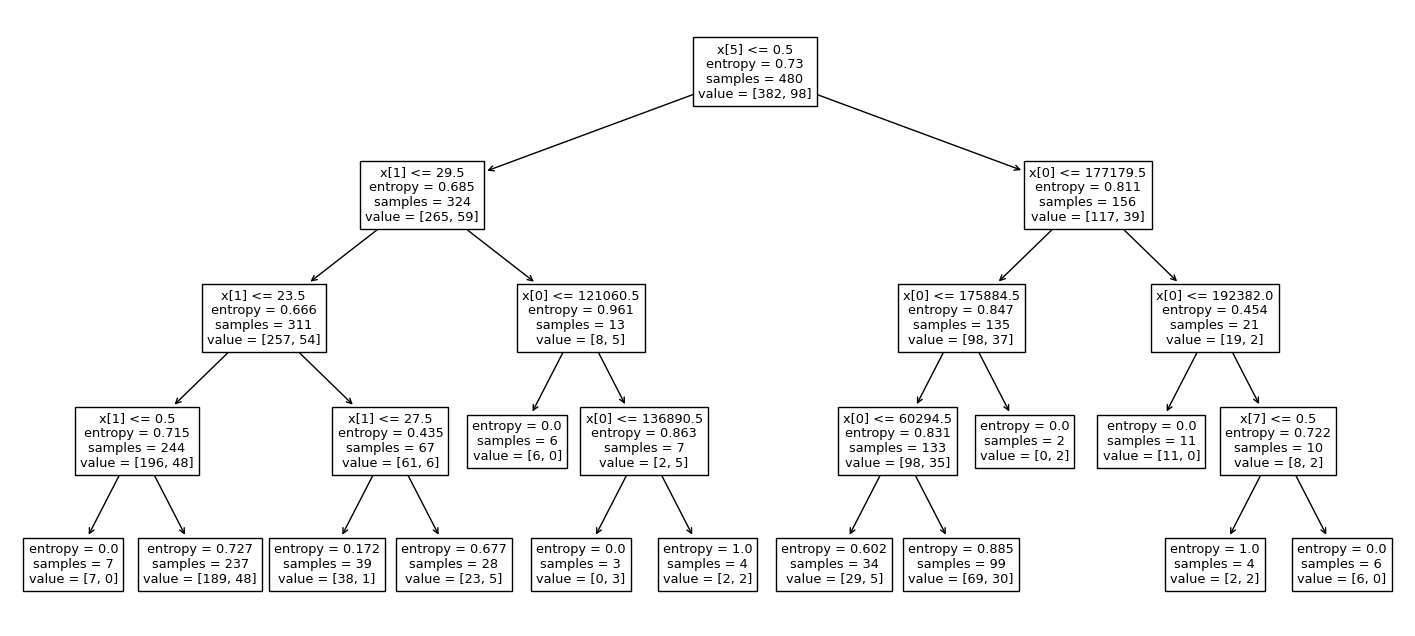

In [22]:
plt.figure(figsize=(18,8))
tree.plot_tree(entropy_m)
plt.show()

b) using Gini criterion

In [23]:
gini_m= DecisionTreeClassifier(criterion='gini',max_depth=4)
gini_m.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
gini_pred= gini_m.predict(x_test)

In [25]:
np.mean(y_test==gini_pred)

0.7833333333333333

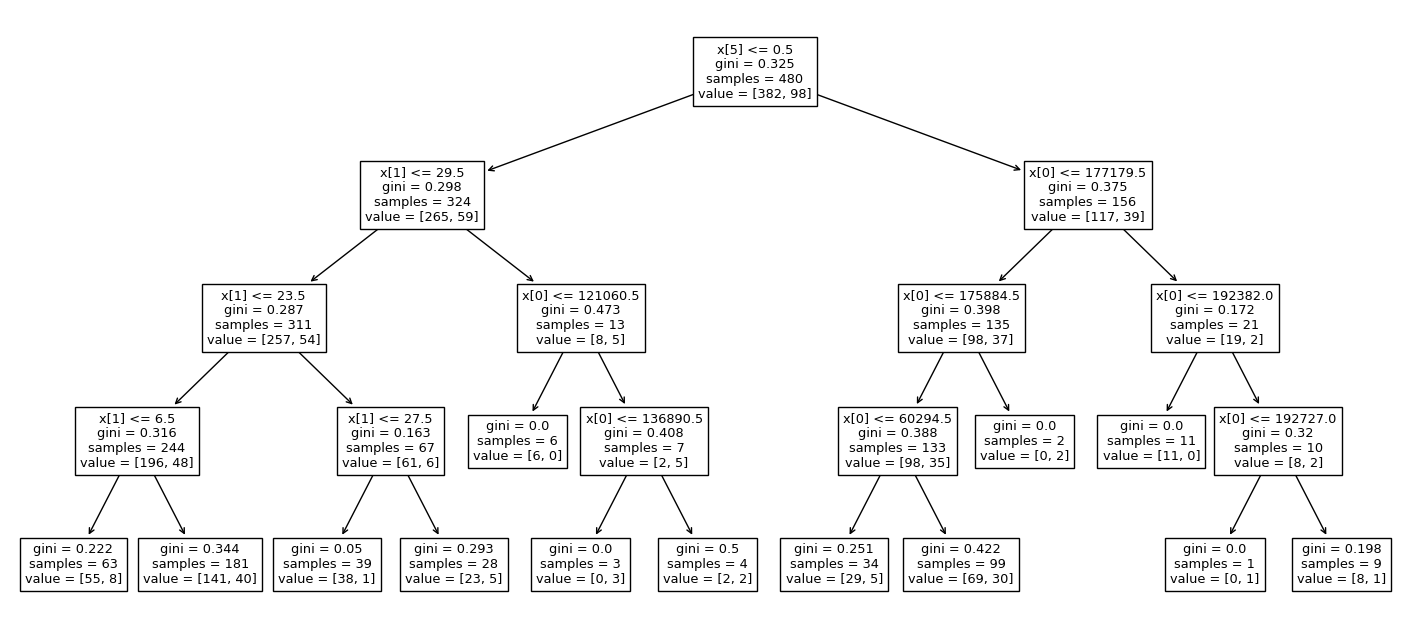

In [26]:
plt.figure(figsize=(18,8))
tree.plot_tree(gini_m)
plt.show()

c) HyperParameter Tuning

In [27]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)

In [28]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [29]:
DT= DecisionTreeClassifier()
grid = GridSearchCV(DT, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.7933333333333333
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


# **Building Final Model**

In [31]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)

In [32]:
final_model= grid.best_estimator_
final_model.fit(x,y)
results = cross_val_score(final_model, x, y, cv=kfold)
print('Accuracy', np.round(results.mean(),3))

Accuracy 0.793


In [33]:
model_f= grid.best_estimator_
model_f.fit(x_train, y_train)

pred=model_f.predict(x_test)
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.7833333333333333


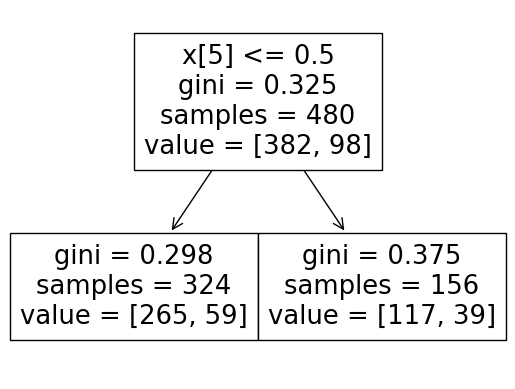

In [34]:
tree.plot_tree(final_model)
plt.show()

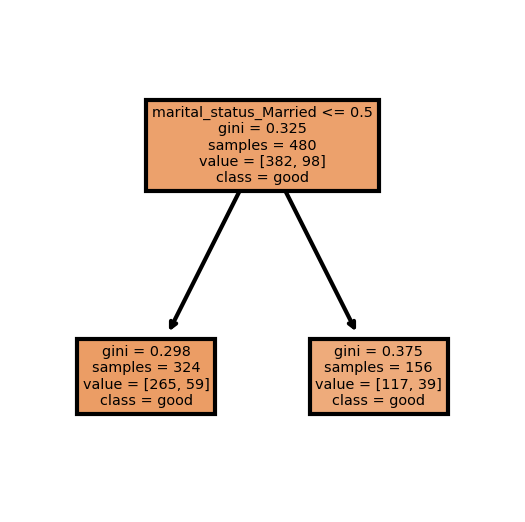

In [35]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(final_model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [40]:
preds = final_model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

0    120
Name: count, dtype: int64

In [41]:
np.mean(preds==y_test)

0.7833333333333333

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [43]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

# Prediction and computing the accuracy
pred=final_model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333

**Decision Tree Regression**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Checking the accuracy
model.score(X_test,y_test)

0.9998635200148774